In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('VGS_clean.csv')

In [4]:
df['year'] = df['year'].apply(lambda s:str(s)[:-2])
df['year'] = pd.DatetimeIndex(pd.to_datetime(df['year'], format="%Y")).year
df.set_index('year', inplace=True)
df.sort_values(by='year', inplace=True)

In [5]:
y = df['global_sales']

In [6]:
y = pd.pivot_table(df ,index = "year" ,
                                       values = "global_sales",
                                       aggfunc = np.sum)

<AxesSubplot:xlabel='year'>

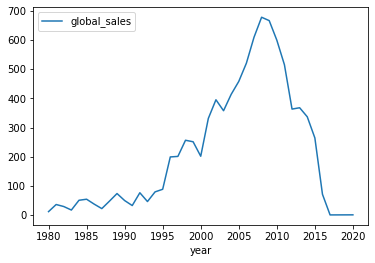

In [7]:
y.plot()

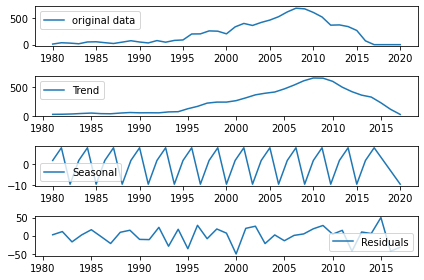

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y, freq=3)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(y, label = 'original data')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

In [9]:
from statsmodels.tsa.stattools import kpss
kpss(y)

/Users/gordonmcintire/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


(0.2843899772458229,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

<AxesSubplot:xlabel='year'>

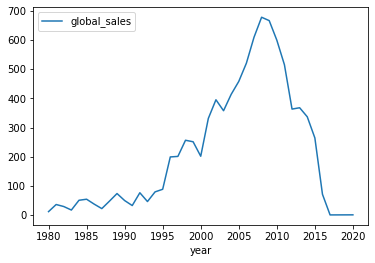

In [10]:
y.plot()

<AxesSubplot:xlabel='year'>

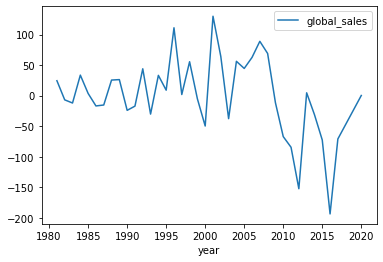

In [11]:
y_diff=y.diff().dropna()
y_diff.plot()

In [12]:
# Import mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [13]:
def evaluate_arima_model(df, arima_order):
    split=int(len(df) * 0.8) 
    train, test = df[0:split], df[split:len(df)]
    past=[x for x in train]
    predictions = list()
    for i in range(len(test)): 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    error = mean_squared_error(test, predictions)
    return error

In [14]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [15]:
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [16]:
evaluate_models(y.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=33881.445
ARIMA(0, 0, 1) MSE=11434.289
ARIMA(0, 1, 0) MSE=11671.704
ARIMA(0, 1, 1) MSE=9651.445
ARIMA(0, 1, 2) MSE=10128.090
ARIMA(0, 2, 0) MSE=8699.355
ARIMA(0, 2, 1) MSE=11417.974
ARIMA(0, 2, 2) MSE=13212.952
ARIMA(1, 0, 0) MSE=9326.917
ARIMA(1, 0, 1) MSE=7305.516


/Users/gordonmcintire/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(1, 0, 2) MSE=7327.708
ARIMA(1, 1, 0) MSE=9550.339
ARIMA(1, 1, 1) MSE=9781.435
ARIMA(1, 2, 0) MSE=8924.886
ARIMA(1, 2, 1) MSE=11292.562
ARIMA(2, 0, 0) MSE=7065.706


/Users/gordonmcintire/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(2, 1, 0) MSE=10239.808
ARIMA(2, 1, 1) MSE=9820.388


/Users/gordonmcintire/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/gordonmcintire/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0) MSE=8806.349
ARIMA(2, 2, 1) MSE=13297.726
Best ARIMA(2, 0, 0) MSE=7065.706


/Users/gordonmcintire/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [17]:
p=2
d=0
q=0
model = ARIMA(y, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(5)

/Users/gordonmcintire/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [18]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           global_sales   No. Observations:                   39
Model:                     ARMA(2, 0)   Log Likelihood                -214.352
Method:                       css-mle   S.D. of innovations             56.920
Date:                Thu, 29 Jul 2021   AIC                            436.703
Time:                        11:38:28   BIC                            443.358
Sample:                             0   HQIC                           439.091
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                157.4110    125.142      1.258      0.208     -87.863     402.685
ar.L1.global_sales     1.3409      0.142      9.446      0.000       1.063       1.619
ar.L2.global_sales    -0.4048      0.144     -2.811      0.005      -0.687      -0.123
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1340           +0.0000j            1.1340            0.0000
AR.2            2.1785           +0.0000j            2.1785            0.0000
-----------------------------------------------------------------------------
"""

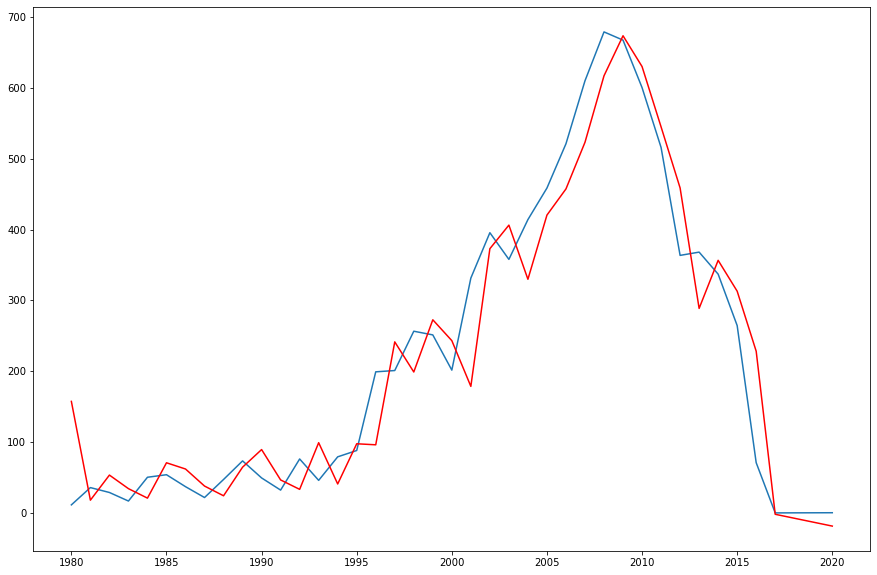

In [19]:
plt.figure(figsize=(15,10))
plt.plot(y)
plt.plot(model_fit.predict(), color = 'red')

In [20]:
# Declare a variable called forecast_period with the amount of months to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast
forecast_period= 5
date_range = pd.date_range(str(y.index[-1]), periods = forecast_period, 
              freq='Y').strftime("%Y").tolist()

# Convert that range into a dataframe that includes your predictions
# First, call DataFrame on pd
future_years = pd.DataFrame(date_range, columns = ['year'])
# Let's now convert the 'Month' column to a datetime object with to_datetime 
future_years['year'] = pd.to_datetime(future_years['year']).dt.year
future_years.set_index('year', inplace = True)

future_years['Prediction'] = pd.Series(forecast[0]).values

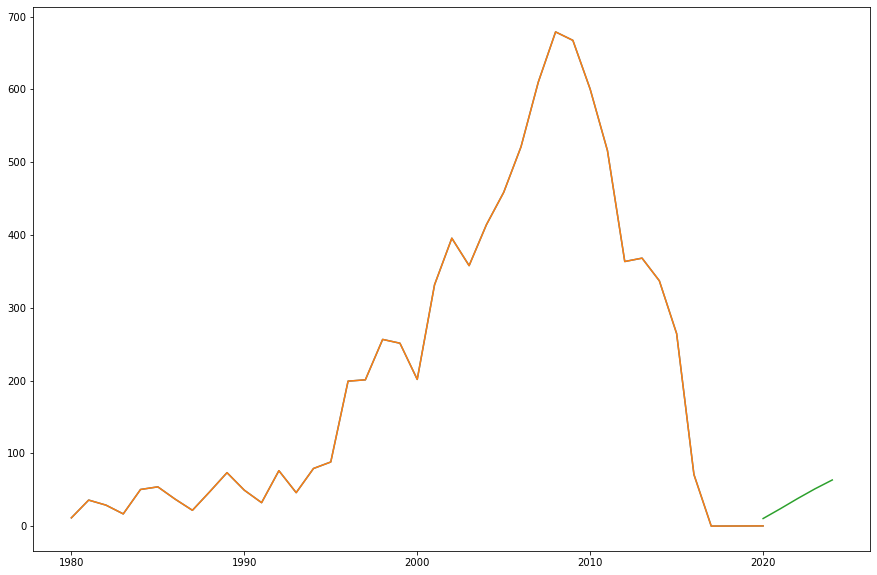

In [21]:
# Declare a variable called forecast_period with the amount of months to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast
forecast_period= 5
date_range = pd.date_range(str(y.index[-1]), periods = forecast_period, 
              freq='Y').strftime("%Y").tolist()

# Convert that range into a dataframe that includes your predictions
# First, call DataFrame on pd
future_years = pd.DataFrame(date_range, columns = ['year'])
# Let's now convert the 'Month' column to a datetime object with to_datetime 
future_years['year'] = pd.to_datetime(future_years['year']).dt.year
future_years.set_index('year', inplace = True)

future_years['Prediction'] = pd.Series(forecast[0]).values

# Plot your future predictions
# Call figure() on plt
plt.figure(figsize=(15,10))
plt.plot(y)
plt.plot(y.append(future_years))
plt.show()

In [23]:
y

,global_sales
year,
1980,11.38
1981,35.77
1982,28.86
1983,16.79
1984,50.36
1985,53.94
1986,37.07
1987,21.74
1988,47.22


In [24]:
returns = y.pct_change()

In [25]:
autocorrelation = returns['global_sales'].autocorr()

In [26]:
print("The autocorrelation of annual returns is %4.2f" %(autocorrelation))

The autocorrelation of annual returns is -0.30


In [31]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

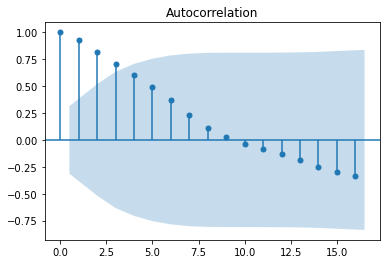

In [32]:
plot_acf(y)
pyplot.show()

In [73]:
from matplotlib import pyplot
from arch import arch_model

In [77]:
# split into train/test
n_test = 10
train, test = y[:-n_test], y[-n_test:]


In [80]:
# define model
model = arch_model(train, mean='Zero', vol='ARCH', p=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)

Iteration:      1,   Func. Count:     18,   Neg. LLF: 187.9051762346482
Iteration:      2,   Func. Count:     35,   Neg. LLF: 187.9039356605088
Iteration:      3,   Func. Count:     52,   Neg. LLF: 187.89950923456465
Iteration:      4,   Func. Count:     69,   Neg. LLF: 187.89714591690372
Iteration:      5,   Func. Count:     86,   Neg. LLF: 187.89712891561717
Iteration:      6,   Func. Count:    102,   Neg. LLF: 187.8971291522758
Optimization terminated successfully    (Exit mode 0)
            Current function value: 187.89712891561717
            Iterations: 6
            Function evaluations: 102
            Gradient evaluations: 6


In [87]:
# plot forecast variance
pyplot.plot(y.variance.values[-1,:])
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

AttributeError: 'DataFrame' object has no attribute 'variance'

Iteration:      1,   Func. Count:     33,   Neg. LLF: 195.0841307494654
Iteration:      2,   Func. Count:     65,   Neg. LLF: 195.06419469317342
Iteration:      3,   Func. Count:     97,   Neg. LLF: 194.99335430344004
Iteration:      4,   Func. Count:    129,   Neg. LLF: 194.97447806022043
Iteration:      5,   Func. Count:    161,   Neg. LLF: 194.96969022636435
Iteration:      6,   Func. Count:    193,   Neg. LLF: 194.96954172324013
Iteration:      7,   Func. Count:    225,   Neg. LLF: 194.9695408881987
Optimization terminated successfully    (Exit mode 0)
            Current function value: 194.9695408881987
            Iterations: 7
            Function evaluations: 225
            Gradient evaluations: 7


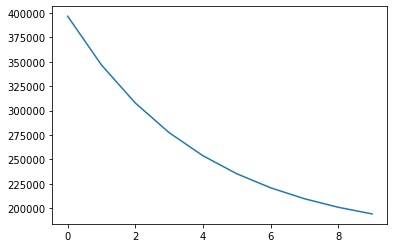

In [84]:
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)

# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()